In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import itertools
import re
import os
import pickle
from datetime import datetime

In [92]:
df_page = pd.read_csv('df_matichon.csv')

In [93]:
df_page = df_page.loc[(df_page['pagePath'] != '/')].copy()

In [94]:
df_page['session_visit'] = df_page.groupby('fullVisitorId')['visitID'].transform('nunique')

In [95]:
df_page['page_per_session'] = df_page.groupby('visitID')['visitID'].transform('count')

In [96]:
df_page['page_all'] = df_page.groupby('fullVisitorId')['visitID'].transform('count')

In [97]:
df_page['category'] = np.where(df_page['content_category'].isnull(), (re.search('/(.*)/', e) for e in df_page['pagePath']), df_page['content_category'] )

In [98]:
df_page['category'] = np.where(df_page['content_category'].isnull(), df_page.pagePath.str.extract('/(.*)/', expand=False), df_page['content_category'] )


In [41]:
s = '/politics/news_2382625'
result = re.search('/(.*)/', s)
print(result.group(1))

politics


In [31]:
df_page.loc[(df_page['fullVisitorId'] == '1001394531712008109')]

,vTime,fullVisitorId,visitID,source,medium,total_sessions,total_pageviews,total_time_on_site,pagePath,hitNumber,...,type,ad_group,ad_unit,content_category,content_sub_category,total_impressions,total_clicks,session_visit,page_per_session,page_all
118,2020-10-07 07:44:17,1001394531712008109,1602031457,google,organic,1,2,27,/politics/news_2382625,2,...,PAGE,5117249679,82060022,politics,none,2,NaN,3,2,3
120,2020-10-07 11:10:46,1001394531712008109,1602043846,google,organic,1,2,25,/news-monitor/news_2382876,2,...,PAGE,4591529700,82060022,news-monitor,none,2,NaN,3,1,3
122,2020-10-07 15:47:29,1001394531712008109,1602060449,google,organic,1,2,7,/politics/news_2383112,2,...,PAGE,4591529700,82060022,politics,none,2,NaN,3,2,3


In [25]:
df_page.groupby('session_visit')['session_visit'].count().nlargest(40)

session_visit
1     157469
2      34257
3      15688
4       8535
5       4547
6       2392
7       1489
8        600
9        425
10       225
20        99
11        75
12        45
Name: session_visit, dtype: int64

In [26]:
df_page.loc[(df_page['session_visit'] == 2)].groupby('page_per_session')['page_per_session'].count().nlargest(40)

page_per_session
4     3202
2     3121
5     3059
6     2806
7     2662
3     2523
8     2267
9     1947
10    1778
11    1541
12    1342
13    1089
14     955
15     795
17     632
16     576
18     471
19     464
1      402
20     389
24     304
22     286
23     199
21     190
25     170
35     143
31     134
27     130
26     123
29     103
33      96
30      83
28      67
38      38
34      34
39      34
42      33
36      23
32      21
37      21
Name: page_per_session, dtype: int64

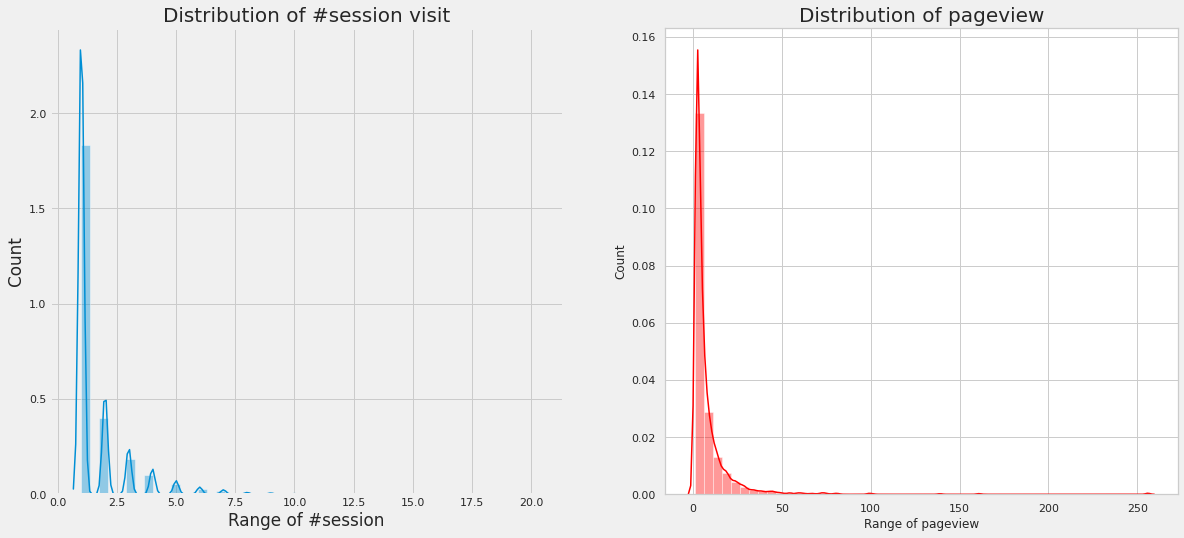

In [100]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_page['session_visit'])
plt.title('Distribution of #session visit', fontsize = 20)
plt.xlabel('Range of #session')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_page['page_all'], color = 'red')
plt.title('Distribution of pageview', fontsize = 20)
plt.xlabel('Range of pageview')
plt.ylabel('Count')
plt.show()

In [40]:
df_page.loc[(df_page['content_category'].isnull())]

,vTime,fullVisitorId,visitID,source,medium,total_sessions,total_pageviews,total_time_on_site,pagePath,hitNumber,...,type,ad_group,ad_unit,content_category,content_sub_category,total_impressions,total_clicks,session_visit,page_per_session,page_all
28,2020-10-07 16:11:41,1000382796327983643,1602061901,m.facebook.com,referral,1,3,1195,/politics/news_2382907,5,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,2,3,13
531,2020-10-07 13:37:23,100580323128862221,1602052643,(direct),(none),1,7,1958,/entertainment/undefined,6,...,PAGE,NaN,NaN,NaN,none,NaN,NaN,2,13,10
803,2020-10-07 14:52:54,1008564056193570079,1602057174,m.facebook.com,referral,1,2,155,/local/quality-life/news_2383092?fbclid=IwAR1q...,2,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2
914,2020-10-07 06:35:29,1009504387695385743,1602027329,m.facebook.com,referral,1,2,281,/entertainment/thai-entertainment/news_2382024...,1,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,1,8,2
962,2020-10-07 18:35:09,1009807513660415931,1602070509,google,organic,1,4,1010,/politics/news_2381745,1,...,PAGE,5190771810,21831535958,NaN,none,NaN,NaN,2,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249581,2020-10-07 12:22:41,4161094000201440232,1602048161,google,organic,1,3,257,/columnist/พลเอกนิพัทธ์-ทองเล็ก,3,...,PAGE,0,21831535958,NaN,none,NaN,NaN,3,6,5
249954,2020-10-07 12:11:06,4165992298738381924,1602047466,m.facebook.com,referral,1,2,81,/politics/news_2381904,1,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,1,18,2
249955,2020-10-07 12:11:06,4165992298738381924,1602047466,m.facebook.com,referral,1,2,81,/politics/news_2382304,2,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,1,18,2
249995,2020-10-07 23:17:44,4166527760890929076,1602087464,m.facebook.com,referral,1,2,150,/politics/news_2381619,1,...,PAGE,NaN,NaN,NaN,NaN,NaN,NaN,1,11,2


In [58]:
df_page.groupby('category')['category'].count().nlargest(40)

category
entertainment                       55859
politics                            47453
social                              25636
local                               24659
region                              20269
sport                                8718
education                            7998
news-monitor                         6639
economy                              5610
foreign                              5183
lifestyle                            4322
columnists                           2194
sport-slide                          2095
privacy-policy                       1520
court-news                            618
newspaper-cover                       600
covid19                               583
article                               496
publicize                             490
prachachuen                           440
book                                  429
advertorial                           396
horoscope-lifestyle                   354
clips                    

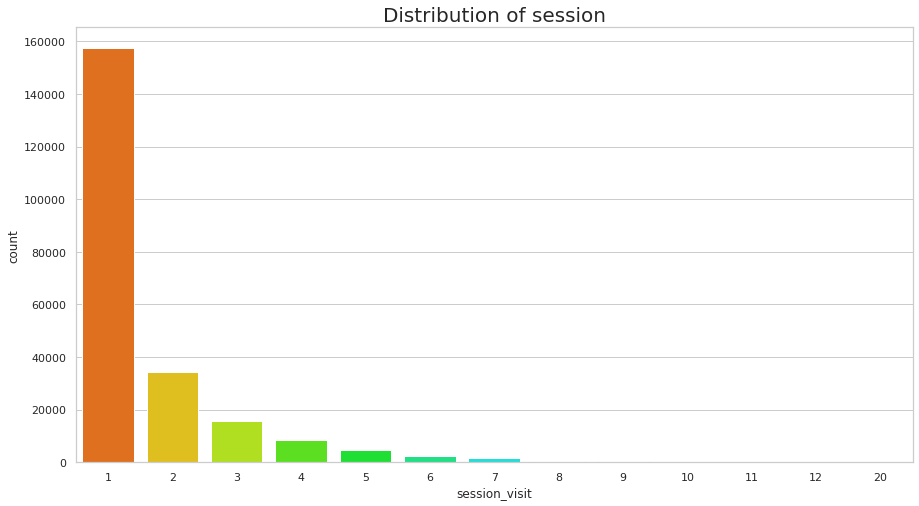

In [59]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_page['session_visit'], palette = 'hsv')
plt.title('Distribution of session', fontsize = 20)
plt.show()


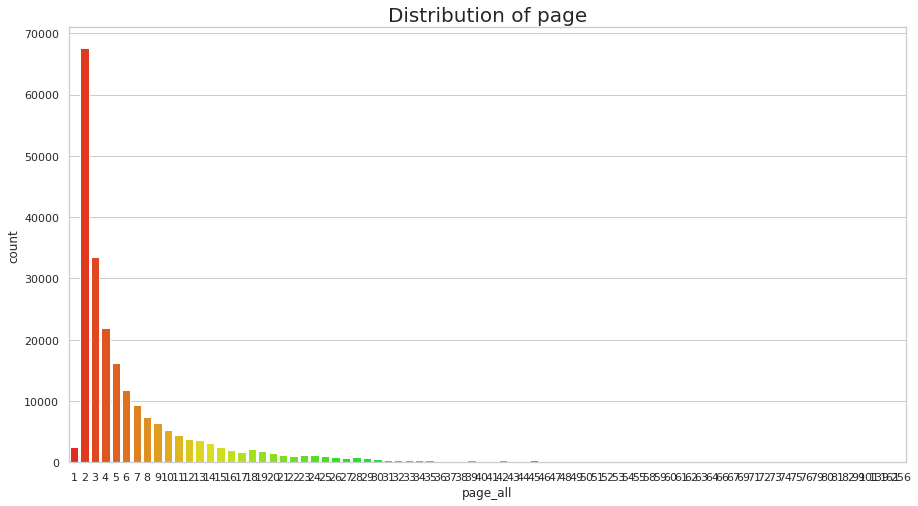

In [60]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_page['page_all'], palette = 'hsv')
plt.title('Distribution of page', fontsize = 20)
plt.show()


In [65]:
df_page.shape

(225846, 22)

In [101]:
df_page.describe()

,fullVisitorId,visitID,total_sessions,total_pageviews,total_time_on_site,hitNumber,time,ad_group,ad_unit,total_impressions,total_clicks,session_visit,page_per_session,page_all
count,2.258460e+05,2.258460e+05,225846.0,225846.000000,225846.000000,225846.000000,2.258460e+05,1.819050e+05,1.819050e+05,83737.000000,88.000000,225846.000000,225846.000000,225846.000000
mean,2.341537e+18,1.602058e+09,1.0,5.539584,638.774178,5.397045,3.275252e+05,4.352731e+09,5.182340e+08,1.602123,1.443182,1.633489,8.535312,8.015294
std,1.121710e+18,1.958074e+04,0.0,10.514099,931.979111,8.693048,6.289668e+05,1.090915e+09,3.048997e+09,0.775578,1.173049,1.318897,10.767479,14.151107
min,1.487078e+13,1.602001e+09,1.0,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,6.659202e+07,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.517521e+18,1.602044e+09,1.0,2.000000,121.000000,1.000000,0.000000e+00,4.591530e+09,8.206038e+07,1.000000,1.000000,1.000000,4.000000,2.000000
50%,2.397529e+18,1.602060e+09,1.0,3.000000,314.000000,3.000000,1.056225e+05,4.591530e+09,8.206038e+07,1.000000,1.000000,1.000000,6.000000,4.000000
75%,3.277214e+18,1.602074e+09,1.0,6.000000,800.000000,6.000000,3.634735e+05,4.591530e+09,8.206038e+07,2.000000,1.000000,2.000000,11.000000,8.000000
max,1.683729e+19,1.602090e+09,1.0,259.000000,21357.000000,260.000000,2.135694e+07,5.393027e+09,2.183162e+10,6.000000,7.000000,20.000000,256.000000,256.000000


In [160]:
df0 = df_page.drop_duplicates('fullVisitorId')
df = df0.loc[(df0['page_all'] < 100)]
x = df.iloc[:, [20, 18]].values

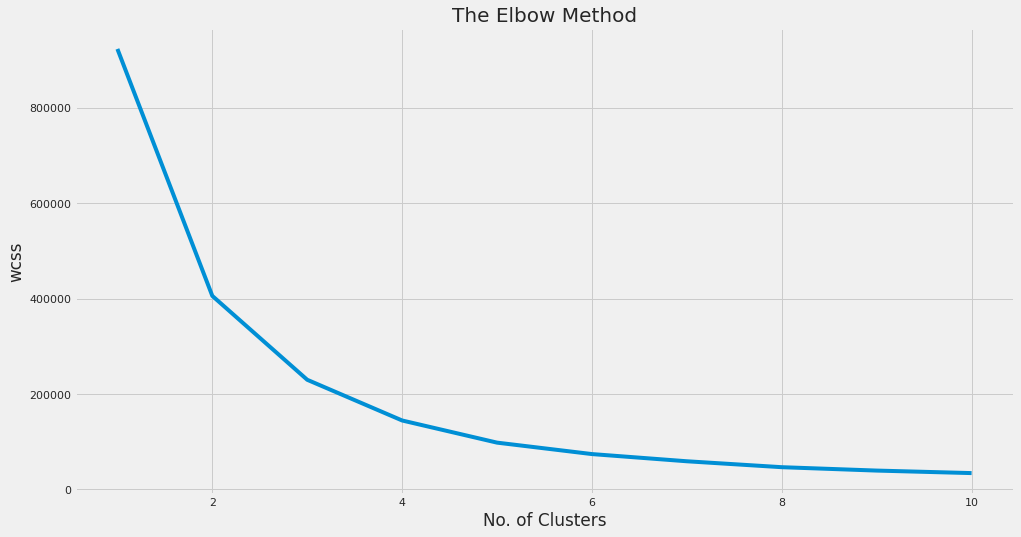

In [89]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

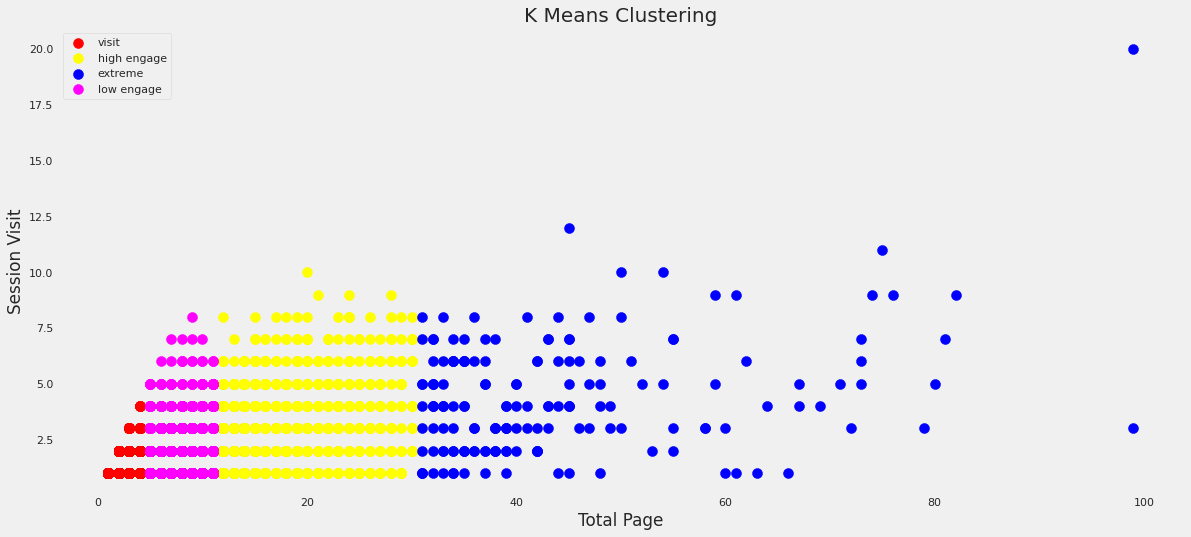

In [176]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'visit')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'high engage')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'extreme')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'low engage')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Total Page')
plt.ylabel('Session Visit')
plt.legend()
plt.grid()
plt.show()

In [166]:
y_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [162]:
test.groupby('session_visit')['session_visit'].count().nlargest(40)

session_visit
1     56351
2      5296
3      1470
4       593
5       248
6       103
7        48
8        22
9         8
10        3
11        1
12        1
20        1
Name: session_visit, dtype: int64

In [163]:
test.groupby('page_all')['page_all'].count().nlargest(40)

page_all
2     33791
3     11175
4      5497
5      3227
1      2549
6      1961
7      1330
8       920
9       718
10      532
11      412
12      312
13      276
14      228
15      164
16      130
18      118
17      102
19       96
20       79
21       54
23       50
24       47
22       44
25       38
26       31
28       29
27       26
29       23
30       19
32       12
34       11
35       11
31       10
33       10
45        9
39        8
37        7
38        7
42        7
Name: page_all, dtype: int64

In [155]:
test

,page_all,session_visit
0,2,1
2,2,1
4,4,1
8,3,1
12,1,1
...,...,...
249991,1,1
249993,2,1
249995,2,1
249997,2,1


In [171]:
test.loc[(test['page_all'] <= 4) & (test['session_visit'] <= 4)]

,page_all,session_visit
0,2,1
2,2,1
4,4,1
8,3,1
12,1,1
...,...,...
249991,1,1
249993,2,1
249995,2,1
249997,2,1


In [172]:
test.loc[(test['page_all'] > 4) & (test['page_all'] <= 11)]

,page_all,session_visit
42,11,2
78,6,1
92,6,1
108,9,1
127,7,1
...,...,...
249822,10,1
249886,6,3
249906,7,1
249913,6,1


In [173]:
test.loc[(test['page_all'] > 11) & (test['page_all'] <= 30)]

,page_all,session_visit
26,13,2
166,12,2
222,14,4
274,21,1
419,16,5
...,...,...
248949,23,7
249494,12,1
249603,18,1
249799,13,1


In [174]:
test.loc[(test['page_all'] > 30)]

,page_all,session_visit
461,39,3
712,72,3
3868,34,1
4083,32,3
6558,48,6
...,...,...
245070,32,5
246537,34,6
247094,43,7
248681,60,3


In [118]:
x = df.iloc[:, [7, 18]].values

In [119]:
df.columns

Index(['vTime', 'fullVisitorId', 'visitID', 'source', 'medium',
       'total_sessions', 'total_pageviews', 'total_time_on_site', 'pagePath',
       'hitNumber', 'time', 'type', 'ad_group', 'ad_unit', 'content_category',
       'content_sub_category', 'total_impressions', 'total_clicks',
       'session_visit', 'page_per_session', 'page_all', 'category'],
      dtype='object')

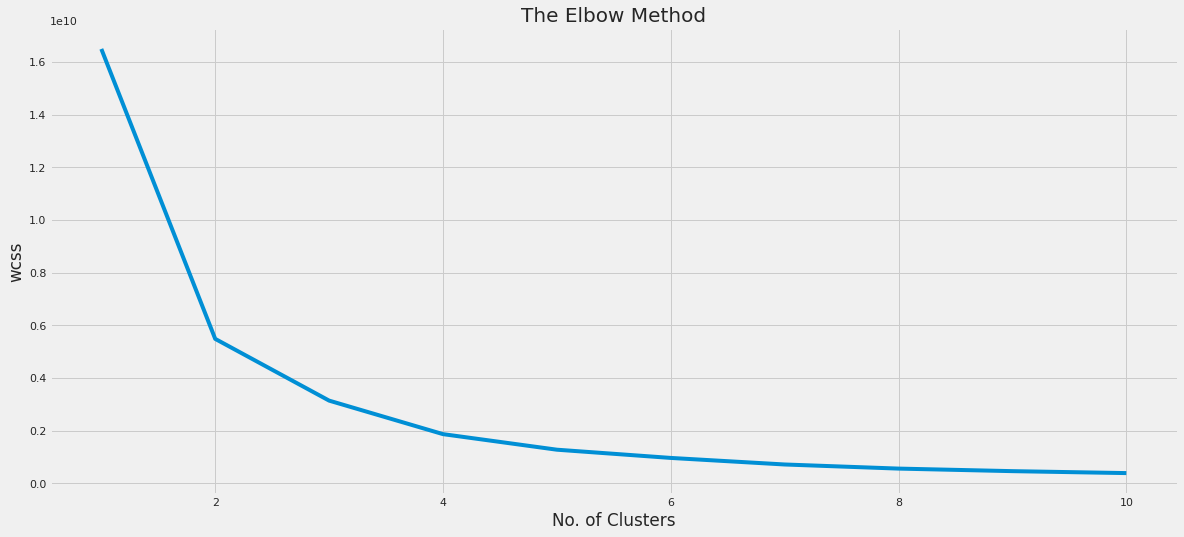

In [120]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

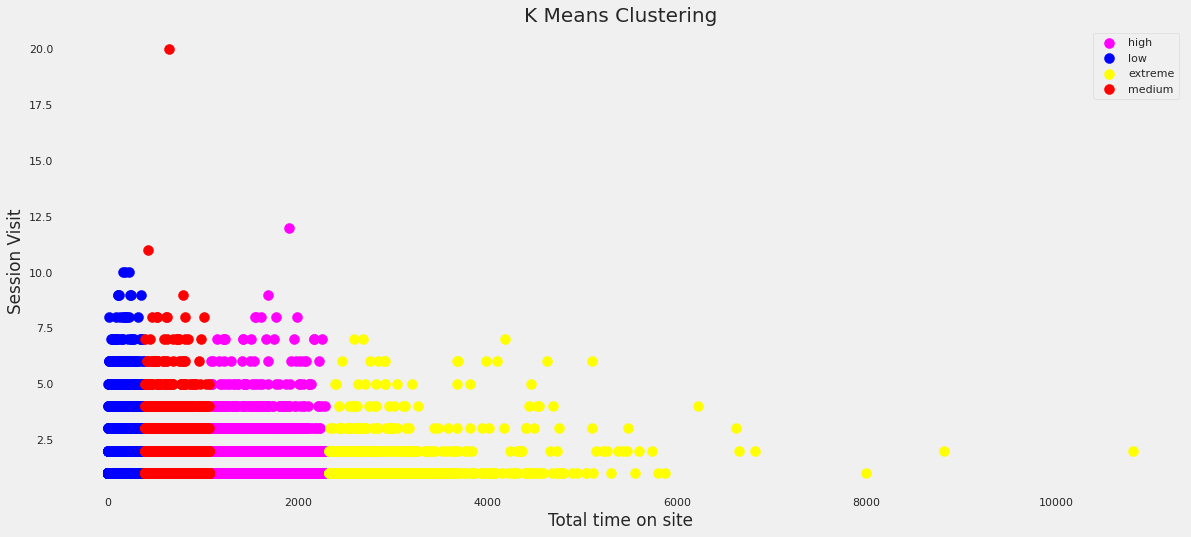

In [131]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'high')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'low')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = 'extreme')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'red', label = 'medium')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

#plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Total time on site')
plt.ylabel('Session Visit')
plt.legend()
plt.grid()
plt.show()

In [133]:
df_page['entertain_yes'] = np.where(df_page['category'] == 'entertainment', 1,0)

In [144]:
df_page.groupby('entertain_yes')['entertain_yes'].count().nlargest(40)

entertain_yes
0    169987
1     55859
Name: entertain_yes, dtype: int64

In [146]:
df_page['prodview'] = df_page.groupby('fullVisitorId')['category'].transform('nunique')

In [147]:
ent = df_page.loc[(df_page['entertain_yes'] == 1)].drop_duplicates(['fullVisitorId'])

In [149]:
df_page['ent'] = df_page.fullVisitorId.isin(ent.fullVisitorId).astype(int)

In [140]:
df_page.groupby('category')['category'].count().nlargest(40)

category
entertainment                       55859
politics                            47453
social                              25636
local                               24659
region                              20269
sport                                8718
education                            7998
news-monitor                         6639
economy                              5610
foreign                              5183
lifestyle                            4322
columnists                           2194
sport-slide                          2095
privacy-policy                       1520
court-news                            618
newspaper-cover                       600
covid19                               583
article                               496
publicize                             490
prachachuen                           440
book                                  429
advertorial                           396
horoscope-lifestyle                   354
clips                    

In [ ]:
df_page['entertain_yes'] = np.where(df_page['category'] == 'entertainment', 1,0)

In [152]:
test = df.iloc[:, [20, 18]]
test

,page_all,session_visit
0,2,1
2,2,1
4,4,1
8,3,1
12,1,1
...,...,...
249991,1,1
249993,2,1
249995,2,1
249997,2,1


In [154]:
df0

,vTime,fullVisitorId,visitID,source,medium,total_sessions,total_pageviews,total_time_on_site,pagePath,hitNumber,...,ad_group,ad_unit,content_category,content_sub_category,total_impressions,total_clicks,session_visit,page_per_session,page_all,category
0,2020-10-07 21:19:49,1.000008e+17,1602080389,(direct),(none),1,2,83,/entertainment/news_2384076,1,...,4.591530e+09,82060382.0,entertainment,none,NaN,NaN,1,4,2,entertainment
2,2020-10-07 21:29:23,1.000033e+18,1602080963,t.co,referral,1,2,101,/education/news_2382815,1,...,4.591530e+09,82060382.0,education,none,1.0,NaN,1,7,2,education
4,2020-10-07 21:56:42,1.000066e+18,1602082602,taboola,exchange,1,4,552,/social/news_2383774,1,...,4.591530e+09,82060382.0,social,none,NaN,NaN,1,4,4,social
8,2020-10-07 08:01:24,1.000084e+18,1602032484,google,organic,1,3,240,/region/news_2377952,1,...,4.591530e+09,82060382.0,region,none,NaN,NaN,1,10,3,region
12,2020-10-07 01:06:38,1.000086e+18,1602007598,google,organic,1,3,162,/region/news_2382316,2,...,0.000000e+00,82060382.0,region,none,1.0,NaN,1,1,1,region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,2020-10-07 10:38:48,4.166482e+18,1602041928,kyetc.net,referral,1,3,112,/local/quality-life/news_2382681,2,...,0.000000e+00,82060382.0,local,quality-life,1.0,NaN,1,5,1,local
249993,2020-10-07 13:40:29,4.166502e+18,1602052829,m.facebook.com,referral,1,2,18,/social/news_2379835,1,...,4.591530e+09,82060622.0,social,none,NaN,NaN,1,4,2,social
249995,2020-10-07 23:17:44,4.166528e+18,1602087464,m.facebook.com,referral,1,2,150,/politics/news_2381619,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,11,2,politics
249997,2020-10-07 16:58:40,4.166603e+18,1602064720,(direct),(none),1,2,30,/entertainment/news_2382752,1,...,4.591530e+09,82060382.0,entertainment,none,NaN,NaN,1,5,2,entertainment
